<center>
    <img src="resource/logo_uvsq.jpg" width="40%" />
    <br />
    <h1>Machine Learning avec Scikit-Learn</h1>
    <br /><br />
    <a href="mailto:almada.livia@gmail.com">Lívia Almada</a>
    <br /><br />
    Université de Versailles Saint-Quentain en Yveline
</center>

In [0]:
# Global settings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=UserWarning)
warnings.simplefilter(action="ignore", category=RuntimeWarning)

## Apprentissage non Supervisé (Unsupervised Learning)
La différence entre ce type d'apprentissage et l'autre supervisé est que dans l'apprentissage non supervisé les données n'ont pas de classes (Labels). 

L'algorithm devrait trouver et construire des structures pratiques à partir des données non classifiées, i.e., Regrouper les données similaires. La similarité est déduite à partir des caractéristiques différentes dans les données.

On appelle cette technique de regroupement: __Clustering__

Il existe deux types de Clustering:
1. Flat Clustering
2. Hierarchical Clustering


### Flat Clustering: K-Means
K-Means est l'un des algorithmes de clustering les plus populaires. Il identifie K "centroids" qui sont utilisés pour définir les Clusters. Un point est considéré comme étant dans un cluster particulier s'il est plus proche du centoide de ce cluster que tout autre centroide.

### Clustering Handwritten Digits
On va voir comment K-means fonctionne en utilisant le chiffres dataset dans scikit-learn.

In [0]:
import matplotlib.pyplot as plt
import tutorial as tt

# Une fonction pour visualiser les chiffres
def print_digits(images, y, max_n=10):
    plt.figure(1)
    plt.clf()
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05
                        , wspace=0.05)
    i = 0
    while i < max_n and i<images.shape[0]:
        p = fig.add_subplot(20, 20, i+1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        p.text(0, 14, str(y[i]))
        i += 1
    plt.show()


ModuleNotFoundError: ignored

<Figure size 432x288 with 0 Axes>

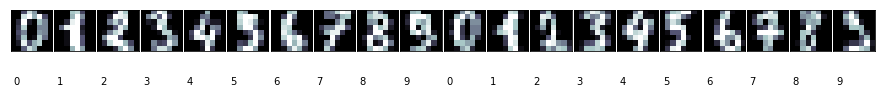

In [0]:
# Importer numpy
import numpy as np

# Importer load_digits de sklearn.datasets 
from sklearn.datasets import load_digits

# Importer scale de sklearn.preprocessing
from sklearn.preprocessing import scale

# Utiliser load_digits() pour charger les chiffres
digits = load_digits()

# Utiliser scale sur les données (data attribute)
data = scale(digits.data)

# Utiliser la fonction print_digits définie ci-dessus pour 
 # visualiser les chiffres
print_digits(digits.images, digits.target, max_n=20)

On peut voir les chiffres (écrits à la main) avec les classes cibles au dessous. On ne va pas utiliser ces classes parce qu'on fait un apprentissage non suppervisé (Clustering).

Ensuite, on va tester si on pourrait regroupper les figures en basant sur leur similarités. Normalement on devra avoir 10 clusters.

In [0]:
# Importer train_test_split de sklearn.model_selection
from sklearn.model_selection import train_test_split

# Utiliser train_test_split pour diviser les données en deux parties. 
#  Une pour l'apprentissage et l'autre pour l'évaluation
X_train, X_test, y_train, y_test, images_train, images_test = \
train_test_split(
    digits.data, digits.target, digits.images, test_size=0.25,
    random_state=41)

# Récupérer le nombre d'échantillons et le nombre d'attributs (features)
print("Nbr d'echan:", digits.data.shape[0])
print("Nbr d'attributs:", digits.data.shape[1])

# Utiliser la fonction unique dans numpy pour recupérer 
#  le nombre de chiffres
unique_labels = np.unique(digits.target)
print(unique_labels)


Nbr d'echan: 1797
Nbr d'attributs: 64
[0 1 2 3 4 5 6 7 8 9]


In [0]:
# Utiliser le KMeans dans sklearn.cluster pour 
#  initialiser le KMeans algorithm
from sklearn.cluster import KMeans

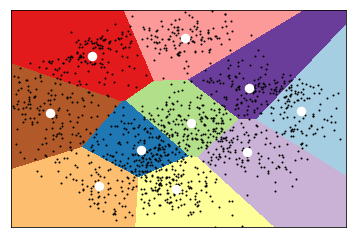

In [0]:


# Il faut spécifier au moins deux paramètres pour KMeans:
#  init et n_clusters
clf = KMeans(init='k-means++', n_clusters=10)


# Utiliser fit pour fair l'apprentissage
clf.fit(X_train)

# Quel est la différence entre la méthod 
#  fit ici et dans l'apprentissage supervisé?


# Utiliser la fonction plot_clusters dans 
# tutorial.py pour visualiser le KMeans sur ces données
tt.plot_clusters(X_train)

<Figure size 432x288 with 0 Axes>

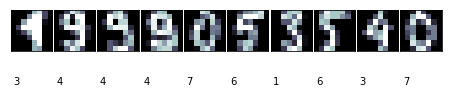

In [0]:
# Visualiser les 10 premiers chiffres dans le dataset
#  d'apprentissage avec les numéros de leurs cluster.
# Utiliser l'attribut labels_ 
#  sur le KMeans instancié dans l'exercice ci-dessus
print_digits(images_train, clf.labels_)


<Figure size 432x288 with 0 Axes>

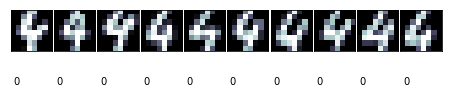

<Figure size 432x288 with 0 Axes>

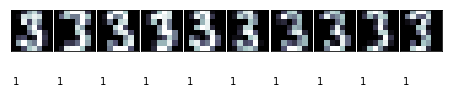

<Figure size 432x288 with 0 Axes>

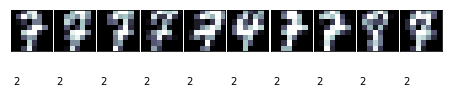

<Figure size 432x288 with 0 Axes>

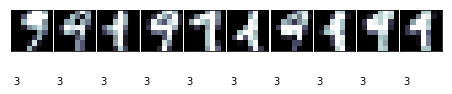

<Figure size 432x288 with 0 Axes>

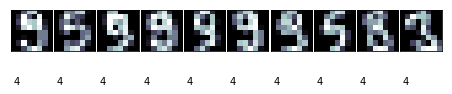

<Figure size 432x288 with 0 Axes>

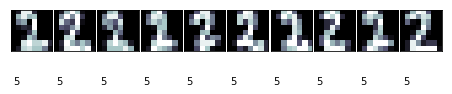

<Figure size 432x288 with 0 Axes>

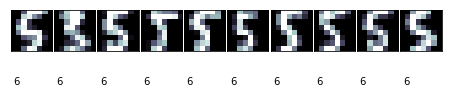

<Figure size 432x288 with 0 Axes>

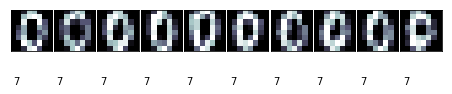

<Figure size 432x288 with 0 Axes>

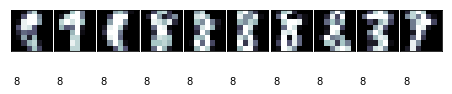

<Figure size 432x288 with 0 Axes>

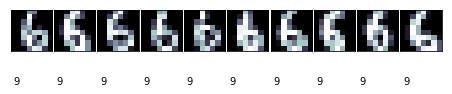

In [0]:
# Utiliser la méthode predict (comme dans l'apprentissage supervisé) 
#  pour fair le clustering du dataset d'évaluation
y_pred = clf.predict(X_test)

# Une fonction qui utilise le fancy indexing dans python pour
#  sélectionner les images qui appartient dans un certain cluster
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred==cluster_number]
    y_pred = y_pred[y_pred==cluster_number]
    print_digits(images, y_pred, max_n=10)
    
# Utiliser la fonction print_cluster pour visualiser les dix
#  premiers chiffres (dans le dataset d'évaluation) 
#  qui sont regroupés dans chaque cluster (de 0 à 10)
for i in range(10):
    print_cluster(images_test, y_pred, i)

In [0]:
# Afficher la matrice de confusion dans sklearn.metrics
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 1  0  0  0  0  0  0 40  0  0]
 [ 0  0  0 13  0  6  1  0 20  1]
 [ 0  3  0  0  1 44  0  0  1  0]
 [ 0 33  0  0  4  0  1  0  2  0]
 [44  0  2  0  0  0  0  0  0  0]
 [ 0  0  0  0 12  0 34  0  0  0]
 [ 0  0  0  0  0  0  0  0  1 47]
 [ 0  0 41  0  0  0  0  0  1  0]
 [ 0  0  1  0 13  0  1  0 28  0]
 [ 0  3  1  7 41  0  1  0  1  0]]


## Clustering Iris Dataset
On va utiliser K-Means pour le clustering du dataset des fleurs iris

In [0]:
# Comme dans load_digits, utiliser load_iris pour charger les données
from sklearn.datasets import load_iris
iris = load_iris()

# Afficher la description du dataset iris
print(iris.DESCR)
# Récupérer le nombre d'échantillons et le nombre d'attributs (features)
data = iris.data
print("Nbr d'echan:", data.shape[0])
print("Nbr d'attributs:", data.shape[1])


In [0]:
def plot_iris(X, y, x_axis, legend):
    # X est un numpy array qui contient les échantillons
    # y est un numpy array qui contient les classes 
    #  (le numéro du type de l'iris)
    # x_axis est une liste qui contient les noms des attributs
    #  (sepal length, sepal width,...)
    # legend est une liste qui contient les noms des classes 
    #  (le type de l'iris)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    colors = ['red', 'yellow', 'green']
    for i in range(len(colors)):
        start = True
        for xs in X[y == i]:
            if start:
                ax.plot(xs,'o-', c=colors[i], label=legend[i])
                start = False
            else:
                ax.plot(xs, 'o-', c=colors[i])
    plt.xticks(range(len(x_axis)), x_axis, size='small')
    plt.legend()
    plt.show()

def plot_iris_scatter(X, y, axis, legend, col1, col2):
    # col1 et col2 sont des nombre entier entre 0 et 3 inclus, 
    #  pour sélectionner deux attributs à visualiser
    colors = ['red', 'yellow', 'green']
    for i in range(len(colors)):
        xs = X[:, col1][y == i]
        ys = X[:, col2][y == i]
        plt.scatter(xs, ys, c = colors[i])
    plt.legend(legend)
    plt.xlabel(axis[col1])
    plt.ylabel(axis[col2])
    plt.show()

# Utiliser plot_iris pour visualiser l'iris 
#  dataset avec tous le 4 attributs
plot_iris(iris.data, iris.target, iris.feature_names, iris.target_names)

# Utiliser plot_iris_scatter pour visualiser l'iris dataset 
#  avec juste 2 attributs. Il faut varier col1 et col2.
plot_iris_scatter(iris.data, iris.target, iris.feature_names, 
                  iris.target_names,0, 1 )

In [0]:
# Visualiser les iris en utilisant petal width et petal length
#  (attribut numéro 2 et 3)
plot_iris_scatter(iris.data, iris.target, iris.feature_names, 
                  iris.target_names,2, 3)

# Utiliser train_test_split pour diviser les données en deux parties.
#  Une pour l'apprentissage et l'autre pour l'évaluation
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   test_size=0.25, 
                                                    random_state=40)

# Utiliser K-Means pour faire le clustering. Faire l'apprentissage
#  juste avec le petal width et petal length au début
X = X_train[:,2:]
kmeans = KMeans(init='k-means++', n_clusters=3)
kmeans.fit(X)

In [0]:
def plot_iris_clusters(clf, X, y, axis, legend, loc='lower right'):
    h = .01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    a = np.c_[xx.ravel(), yy.ravel()]
    z = clf.predict(a)
    z = z.reshape(xx.shape)
    plt.imshow(z, interpolation='nearest', 
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired, aspect='auto', origin='lower')
    colors = ['red', 'yellow', 'green']
    for i in range(len(colors)):
        xs = X[:, 0][y == i]
        ys = X[:, 1][y == i]
        plt.scatter(xs, ys, c = colors[i])
    plt.legend(legend, loc=loc)
    plt.xlabel(axis[0])
    plt.ylabel(axis[1])

    centroids = clf.cluster_centers_
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='.',
                s=169, linewidths=3, color='w', zorder=10)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()
    
# Utiliser la fonction plot_iris_clusters avec les données
#  d'apprentissage pour voir les clusters
plot_iris_clusters(kmeans, X, y_train, iris.feature_names[2:],
                  iris.target_names)



In [0]:
# Utiliser la fonction plot_iris_clusters avec 
#  les données d'évaluation pour voir les clusters
X_eval = X_test[:,2:]
plot_iris_clusters(kmeans, X_eval, y_test, iris.feature_names[2:],
                  iris.target_names)

In [0]:
# Répéter les mêmes étapes (visualisation et apprentissage)
#  mais en utilisant sepal width et sepal length (0 et 1)



In [0]:
# Et puis répéter une autre fois avec sepal width et petal length (1 et 2)



## Démo: DBSCAN

On va essayer l'algorithm DBSCAN dans sckit-learn avec des données synthétiques

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import DBSCAN

centers = [[1, 1], [-1, -1], [1, -1]]
x, labels_true = make_blobs(n_samples=750, centers=centers, 
                            cluster_std=0.4,
                            random_state=0)
plt.scatter(x[:,0], x[:,1])
plt.show()

db = DBSCAN(eps=0.3, min_samples=10).fit(x)
labels = set(db.labels_)
n_clusters = len(labels) - (1 if -1 in labels else 0)
print("Nombre de clusters:", n_clusters)



In [0]:
def plot_db_clusters(db, X):
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    unique_labels = set(db.labels_)
    n_clusters = len(unique_labels) - (1 if -1 in labels else 0)
    colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = 'k'

        class_member_mask = (db.labels_ == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=6)

    plt.title('Nombre de Clusters: %d' % n_clusters)
    plt.show()

plot_db_clusters(db, x)

In [0]:
# Créer des autre dataset synthétiques avec make_blobs
#  varier les differents paramètres 
# Et experimenter avec l'algorithm DBSCAN
centers = [[1, 1], [-1, -1], [1, -1], [2,3], [-2,-4]]
x, labels_true = make_blobs(n_samples=750, centers=centers, 
                            cluster_std=0.4,
                            random_state=0)
plt.scatter(x[:,0], x[:,1])
plt.show()

db = DBSCAN(eps=0.3, min_samples=10).fit(x)
plot_db_clusters(db, x)

In [0]:
# Essayer DBSCAN avec petal width et petal length de l'iris
x = iris.data[:,2:]

plot_iris_scatter(iris.data, iris.target, iris.feature_names, 
                  iris.target_names,2, 3)

db = DBSCAN(eps=0.3, min_samples=10).fit(x)
plot_db_clusters(db, x)